### "Customer_Segmentation"

## Por: Edwin Gustavo Lima

### Realizar la segmentación de clientes de tarjeta de crédito utilizando K-Means, Método del Codo para determinar K, PCA para reducir dimensionalidad y Autoencoders. :
---



Se realiza la importacion de las librerias a utilizar

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Se carga el archivo customer final desde google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
customer_df = pd.read_csv("/content/drive/My Drive/ProyectoFinalAD/customer_final.csv")

Realizamos analisis exploratorio

In [ ]:
customer_df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,71053,WHITE METAL LANTERN,6,1/12/2010 08:26,3.39,17850,United Kingdom
1,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 08:26,2.75,17850,United Kingdom
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 08:26,3.39,17850,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 08:26,3.39,17850,United Kingdom
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,1/12/2010 08:26,7.65,17850,United Kingdom
...,...,...,...,...,...,...,...,...
397918,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680,France
397919,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680,France
397920,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680,France
397921,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680,France


In [ ]:
customer_df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,71053,WHITE METAL LANTERN,6,1/12/2010 08:26,3.39,17850,United Kingdom
1,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 08:26,2.75,17850,United Kingdom
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 08:26,3.39,17850,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 08:26,3.39,17850,United Kingdom
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,1/12/2010 08:26,7.65,17850,United Kingdom


Se realiza una revisión de las caracteristicas del data set

Vemos que no existen valores NA, ya que los mismos fueron eliminados con SQL


In [ ]:
customer_df['description'] = customer_df['description'].apply(str)

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397923 entries, 0 to 397922
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    397923 non-null  int64  
 1   stockcode    397923 non-null  object 
 2   description  397923 non-null  object 
 3   quantity     397923 non-null  int64  
 4   invoicedate  397923 non-null  object 
 5   unitprice    397923 non-null  float64
 6   customerid   397923 non-null  int64  
 7   country      397923 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 24.3+ MB


In [ ]:
customer_df.isnull().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64

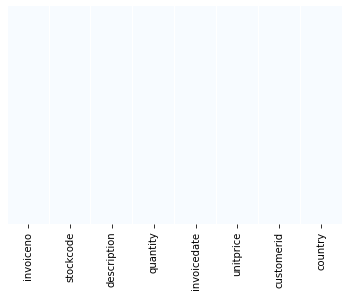

In [ ]:
sns.heatmap(customer_df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe990e64250>,
      dtype=object)

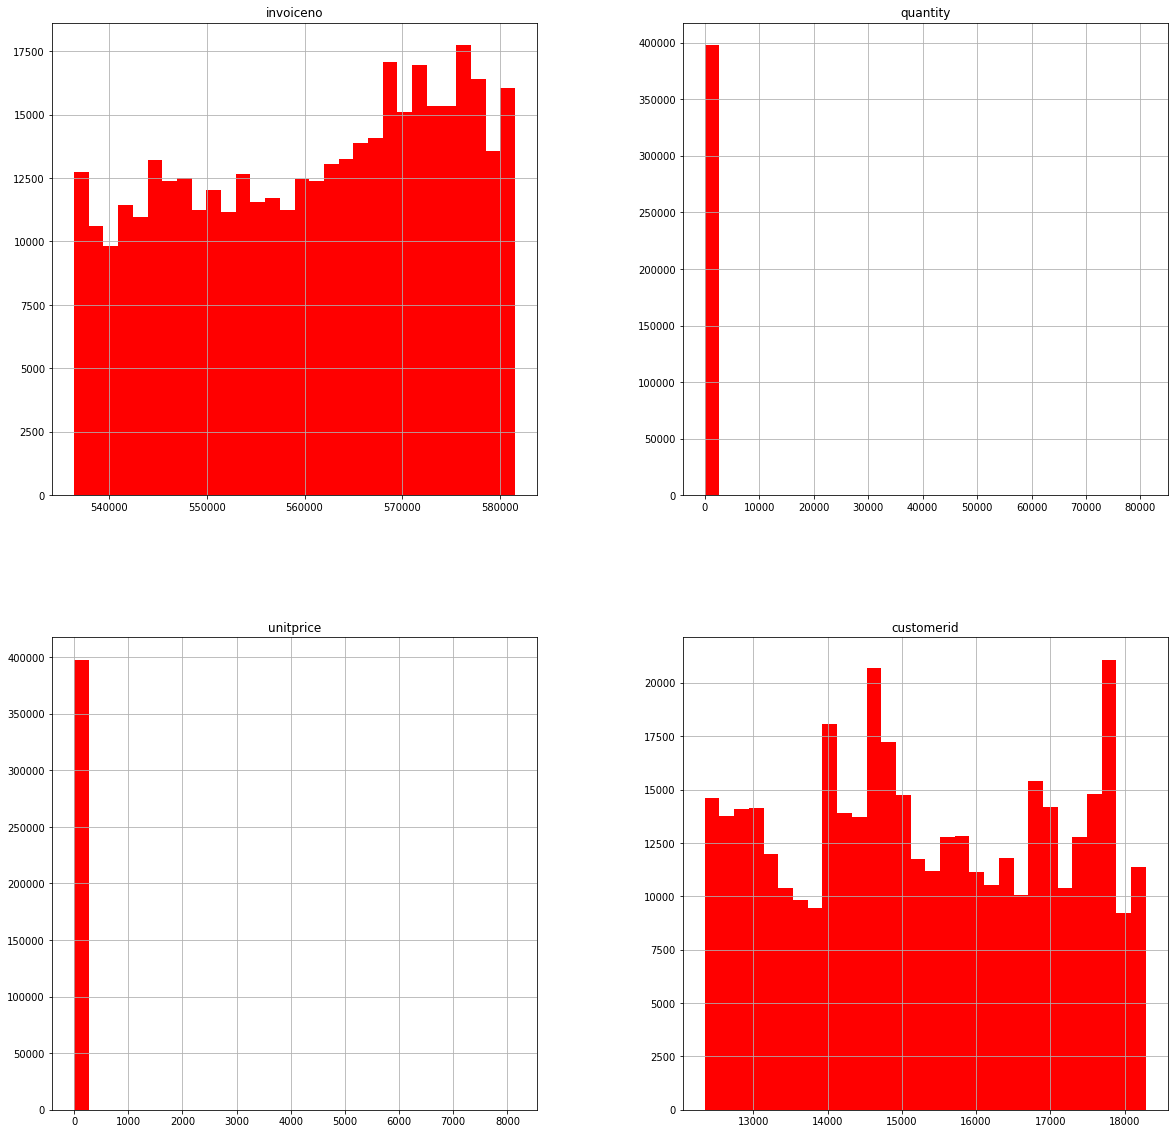

In [ ]:
customer_df.hist(bins = 30, figsize=(20,20), color = 'r')

Verificando valores duplicados.

In [ ]:
customer_df.duplicated().sum()

5192

In [ ]:
customer_df = customer_df.drop(["stockcode"], axis = 1)



In [ ]:
customer_df = customer_df.drop(["description"], axis = 1)

In [ ]:
customer_df = customer_df.drop(["invoicedate"], axis = 1)

In [ ]:
correlations = customer_df.corr()

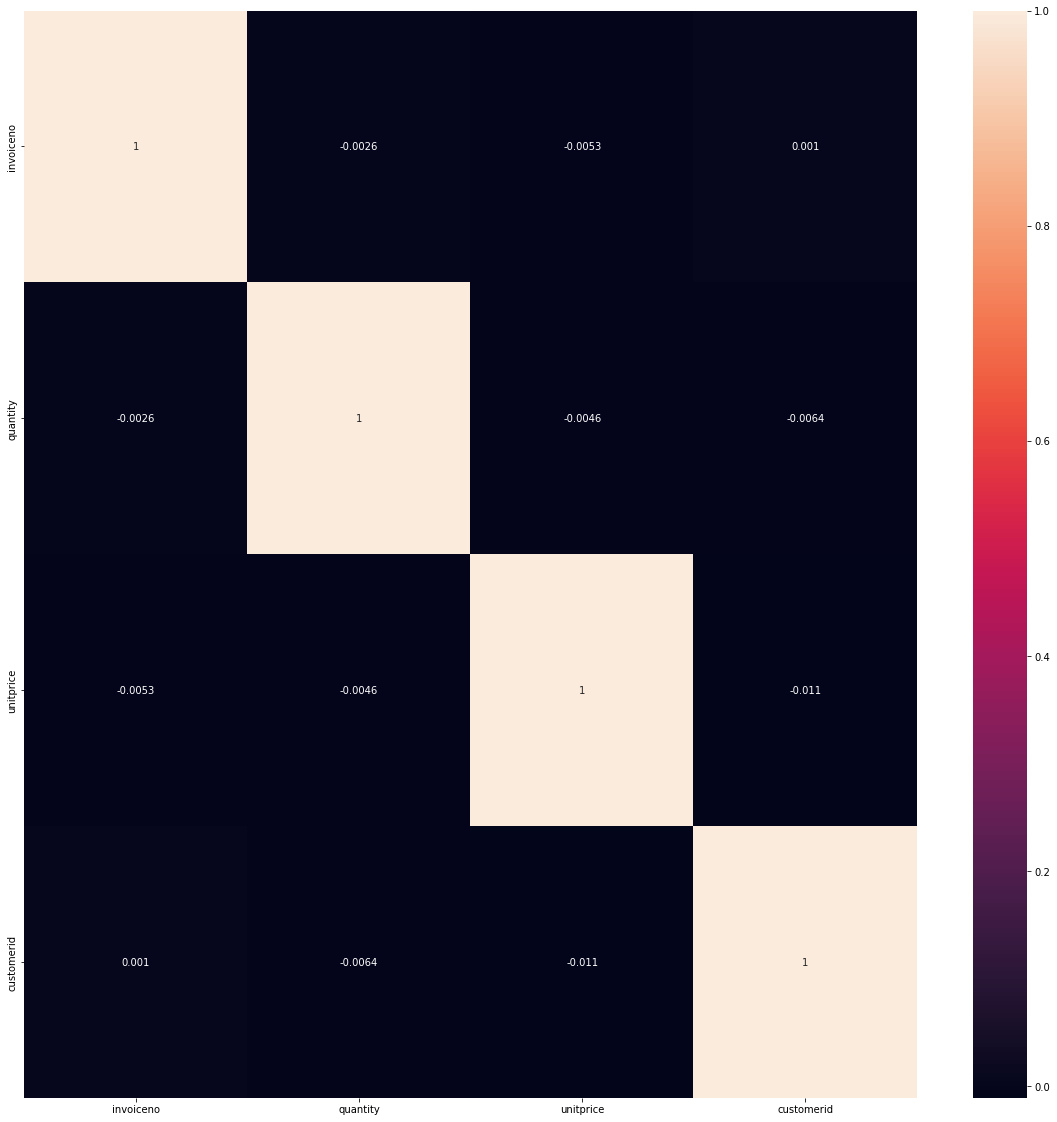

In [ ]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

In [ ]:
cont_df = customer_df.loc[:,['invoiceno','quantity','unitprice','customerid']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

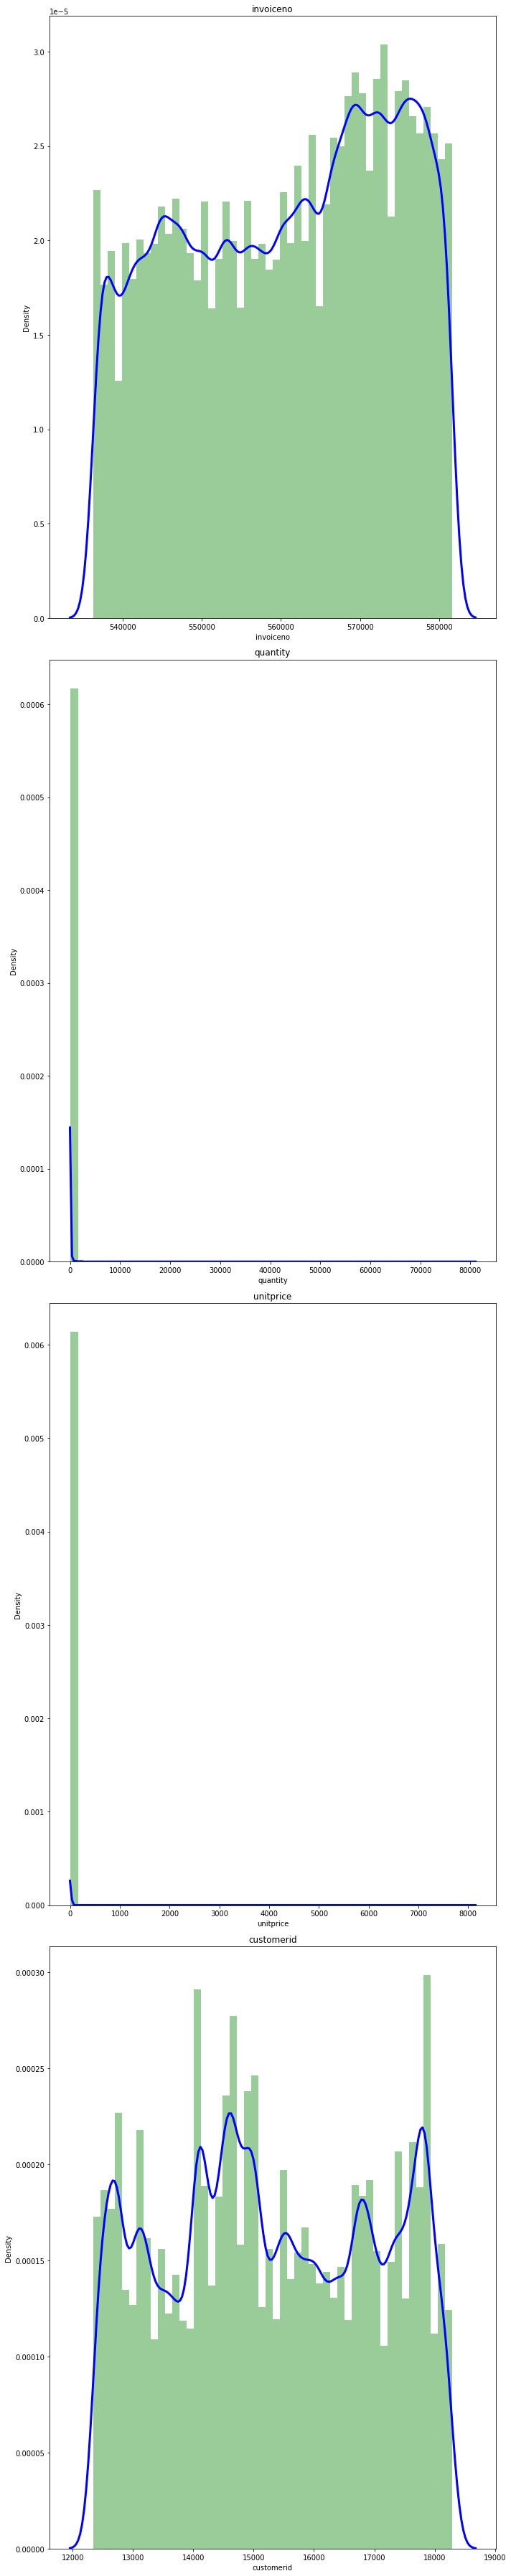

In [ ]:
n = len(cont_df.columns)
plt.figure(figsize = (10, 50))
for i in range(n):
    plt.subplot(n, 1, i+1)
    sns.distplot(cont_df[cont_df.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(cont_df.columns[i])

plt.tight_layout()

Metodo del codo

In [ ]:
categoricas = [var for var in customer_df.columns if customer_df[var].dtype=='O']
print('Existen {} variables categóricas\n'.format(len(categoricas)))

print('Las cuales son:\n\n', categoricas)

Existen 1 variables categóricas

Las cuales son:

 ['country']


In [ ]:
X_cat = customer_df[['country']]

In [ ]:
from sklearn.model_selection import train_test_split

pasar de categoricas a númericas, otro método.

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
customer_df['country'] = le.fit_transform(customer_df['country'])
scaler = StandardScaler()
customer_df_scaled = scaler.fit_transform(customer_df)

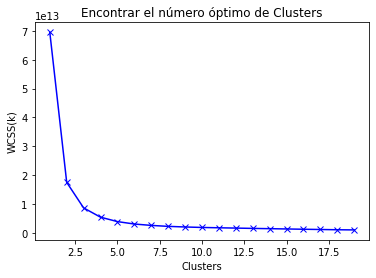

In [ ]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(customer_df)
    scores_1.append(kmeans.inertia_) #WCSS


plt.plot(range_values, scores_1, 'bx-')
plt.title("Encontrar el número óptimo de Clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()

# Entrenamos nuestro model K-Means

In [ ]:
kmeans = KMeans(5)
kmeans.fit(customer_df_scaled)
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

(5, 5)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[customer_df.columns])
cluster_centers

,invoiceno,quantity,unitprice,customerid,country
0,-0.020403,0.030871,0.038483,-1.241629,-3.098607
1,0.795824,-0.006507,-0.015262,0.117720,0.299718
2,0.064078,430.062565,-0.070425,-0.524356,0.320871
3,-0.969717,-0.003911,-0.001894,0.121860,0.296780
4,0.222968,-0.066632,125.800781,-0.498089,-0.777988


In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[customer_df.columns])
cluster_centers

,invoiceno,quantity,unitprice,customerid,country
0,560349.781424,18.591634,3.966524,13167.193024,12.050159
1,571047.352023,11.847878,2.778942,15495.981903,34.858030
2,561457.000000,77605.000000,1.560000,14396.000000,35.000000
3,547907.968812,12.316295,3.074334,15503.074558,34.838311
4,563539.437500,1.000000,2782.909375,14441.000000,27.625000


In [ ]:
labels.shape

(397923,)

In [ ]:
labels.min()

0

In [ ]:
labels.max()

4

In [ ]:
y_kmeans = kmeans.fit_predict(customer_df_scaled)
y_kmeans

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

Agregamos la columna de clusters a nustra informacion inicial

In [ ]:
customer_df_cluster = pd.concat([customer_df, pd.DataFrame({'cluster': labels})], axis = 1)
customer_df_cluster.head()

,invoiceno,quantity,unitprice,customerid,country,cluster
0,536365,6,3.39,17850,35,3
1,536365,8,2.75,17850,35,3
2,536365,6,3.39,17850,35,3
3,536365,6,3.39,17850,35,3
4,536365,2,7.65,17850,35,3


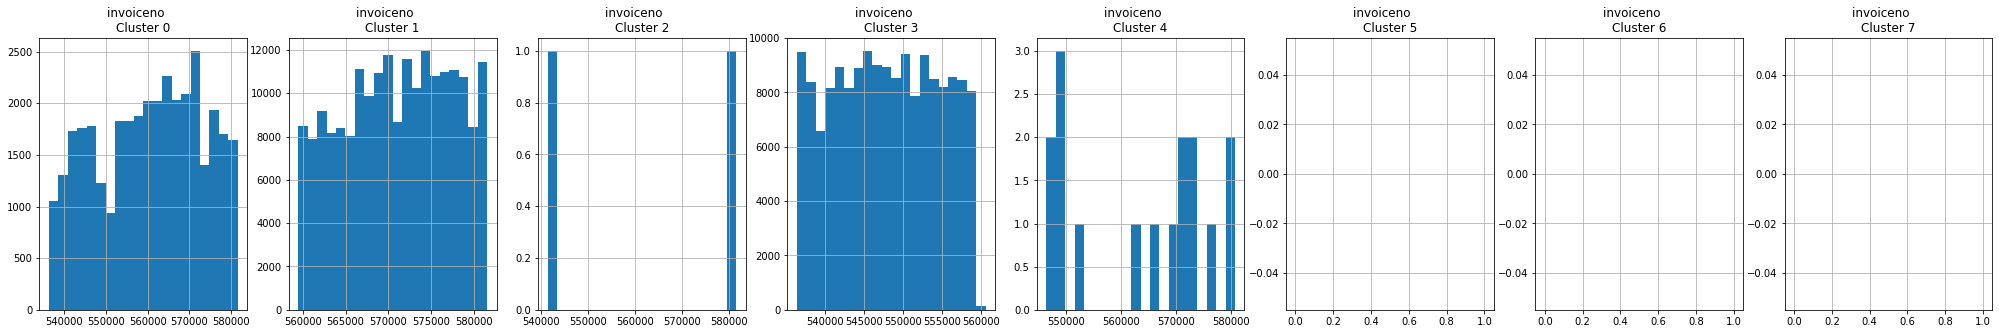

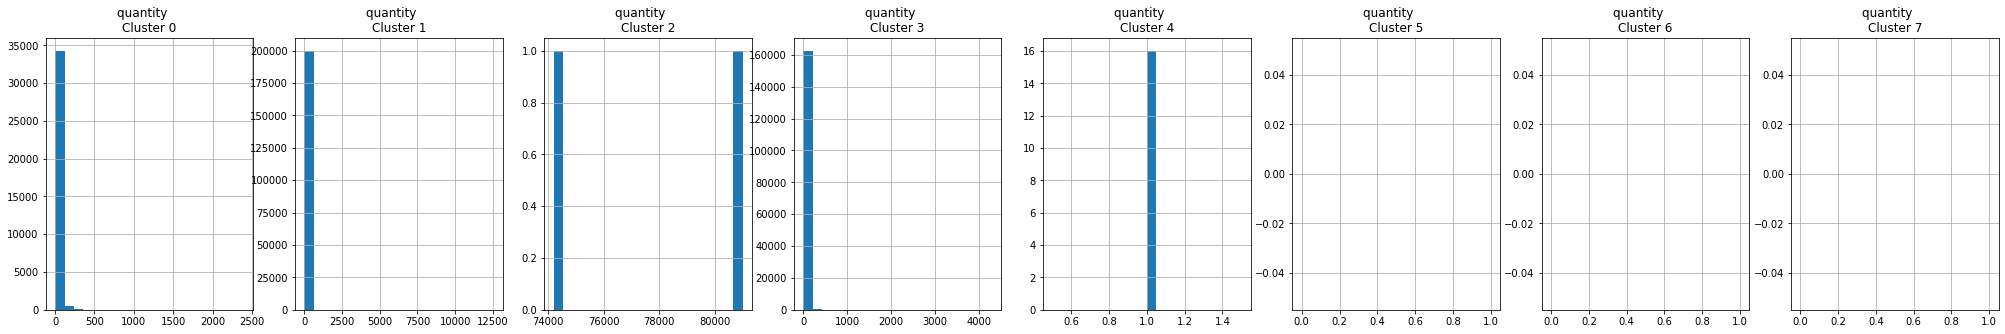

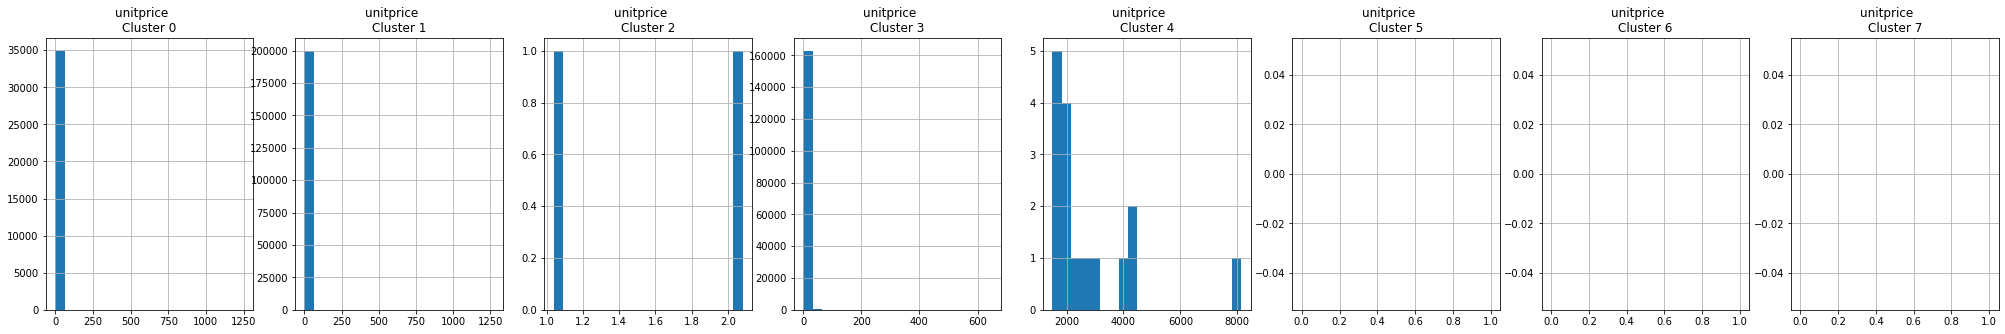

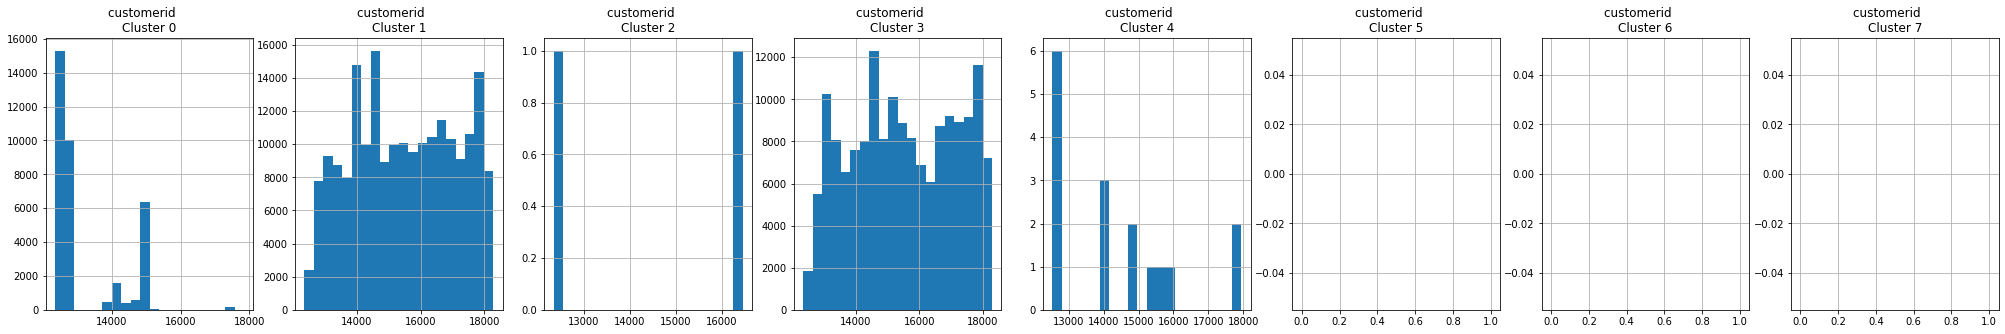

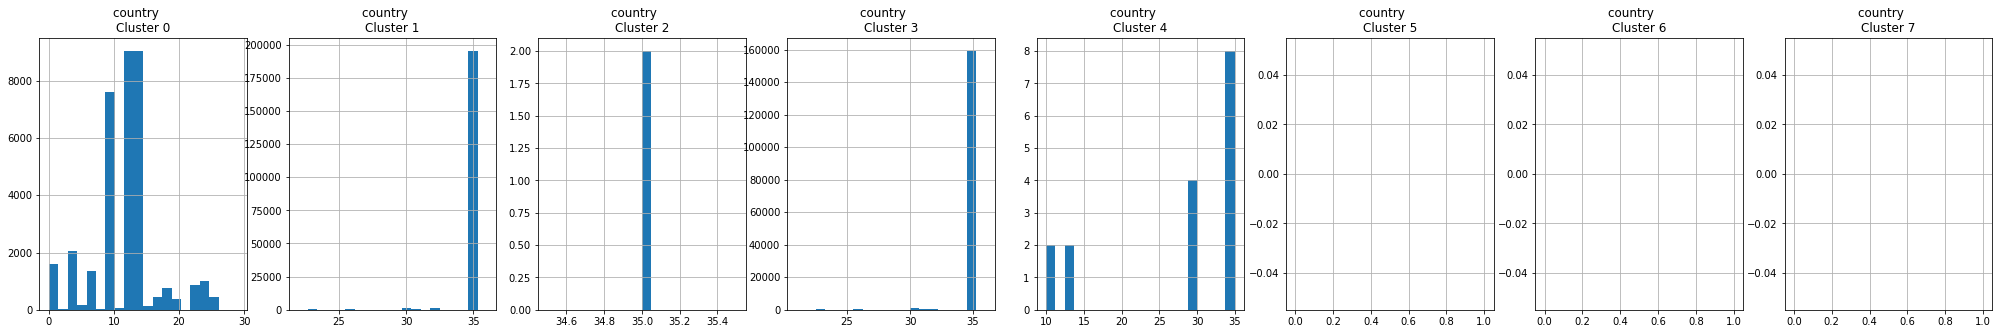

In [ ]:
for i in customer_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = customer_df_cluster[customer_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {}'.format(i, j))
    plt.show()


# PCA

Reducimos a 2 dimenciones

In [ ]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(customer_df_scaled)
principal_comp

array([[-1.23864313,  0.9460364 ],
       [-1.23965477,  0.91920297],
       [-1.23864313,  0.9460364 ],
       ...,
       [ 3.12957779, -0.7824148 ],
       [ 3.12957779, -0.7824148 ],
       [ 3.13112845, -0.75275074]])

Dataframe con los componentes

In [ ]:
pca_df = pd.DataFrame(data = principal_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.238643,0.946036
1,-1.239655,0.919203
2,-1.238643,0.946036
3,-1.238643,0.946036
4,-1.230133,1.100572


Concatenamos con los clusters

In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)

pca_df.head()

,pca1,pca2,cluster
0,-1.238643,0.946036,3
1,-1.239655,0.919203,3
2,-1.238643,0.946036,3
3,-1.238643,0.946036,3
4,-1.230133,1.100572,3


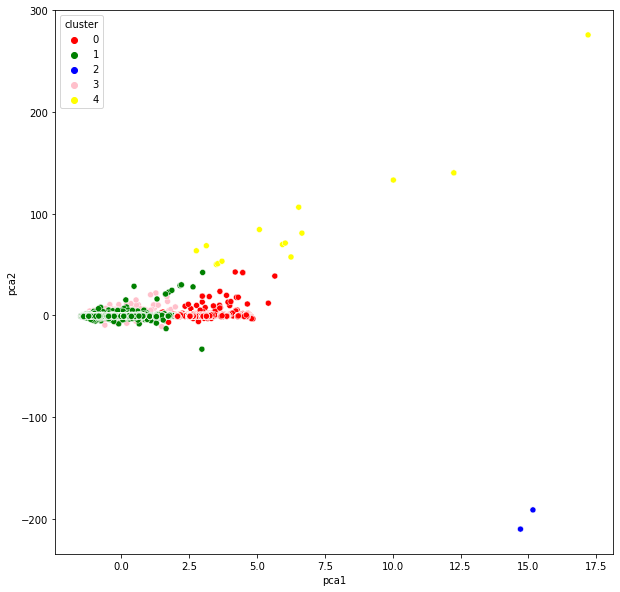

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df,
                     palette = ["red", "green", "blue", "pink", "yellow"])
plt.show()


# Autoencoders

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import gradient_descent_v2 

In [ ]:
encoding_dim = 3
input_df = Input(shape = (5, ))

In [ ]:
x = Dense(encoding_dim, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) #capa neuronal con 500 neuronas 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) #capa neuronal con 500 neuronas
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) #capa neuronal con 2000 neuronas

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

In [ ]:
decoded = Dense(5, kernel_initializer = 'glorot_uniform')(x)
autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
customer_df_scaled.shape

(397923, 5)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense (Dense)               (None, 3)                 18        
                                                                 
 dense_1 (Dense)             (None, 500)               2000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [ ]:
autoencoder.fit(customer_df_scaled, customer_df_scaled, batch_size=128, epochs = 25, verbose = 1)

Epoch 1/25
3109/3109 [==============================] - 103s 33ms/step - loss: 0.3868
Epoch 2/25
3109/3109 [==============================] - 102s 33ms/step - loss: 0.2920
Epoch 3/25
3109/3109 [==============================] - 102s 33ms/step - loss: 0.2948
Epoch 4/25
3109/3109 [==============================] - 102s 33ms/step - loss: 0.4533
Epoch 5/25
3109/3109 [==============================] - 102s 33ms/step - loss: 0.4714
Epoch 6/25
3109/3109 [==============================] - 103s 33ms/step - loss: 0.4562
Epoch 7/25
3109/3109 [==============================] - 103s 33ms/step - loss: 0.4418
Epoch 8/25
3109/3109 [==============================] - 103s 33ms/step - loss: 0.3106
Epoch 9/25
3109/3109 [==============================] - 104s 33ms/step - loss: 1.2145
Epoch 10/25
3109/3109 [==============================] - 106s 34ms/step - loss: 0.3143
Epoch 11/25
3109/3109 [==============================] - 106s 34ms/step - loss: 0.3128
Epoch 12/25
3109/3109 [=============================

In [ ]:
autoencoder.save_weights('autoencoder.h5')

In [ ]:
pred = encoder.predict(customer_df_scaled)

In [ ]:
pred.shape

(397923, 10)

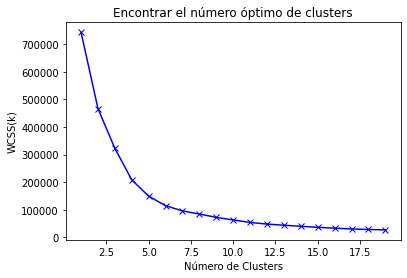

In [ ]:
scores_2 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)


plt.plot(range_values, scores_2, 'bx-')
plt.title("Encontrar el número óptimo de clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

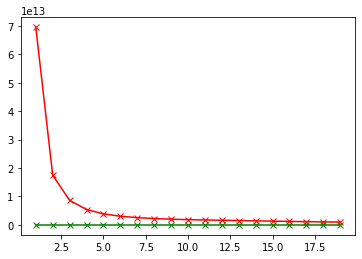

In [ ]:
plt.plot(range_values, scores_1, 'bx-', color = "r")
plt.plot(range_values, scores_2, 'bx-', color = "g")

In [ ]:
kmeans = KMeans(3)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)

In [ ]:
df_cluster_dr = pd.concat([customer_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_dr.head()

,invoiceno,quantity,unitprice,customerid,country,cluster
0,536365,6,3.39,17850,35,0
1,536365,8,2.75,17850,35,0
2,536365,6,3.39,17850,35,0
3,536365,6,3.39,17850,35,0
4,536365,2,7.65,17850,35,0


In [ ]:
pca = PCA(n_components=2)
princ_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = princ_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.217638,-0.526624
1,-1.219708,-0.524679
2,-1.217591,-0.526626
3,-1.217591,-0.526626
4,-1.200185,-0.534687


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis = 1)
pca_df

,pca1,pca2,cluster
0,-1.217638,-0.526624,0
1,-1.219708,-0.524679,0
2,-1.217591,-0.526626,0
3,-1.217591,-0.526626,0
4,-1.200185,-0.534687,0
...,...,...,...
397918,2.069474,-0.153161,2
397919,2.078184,-0.160939,2
397920,2.105505,-0.177687,2
397921,2.105505,-0.177687,2


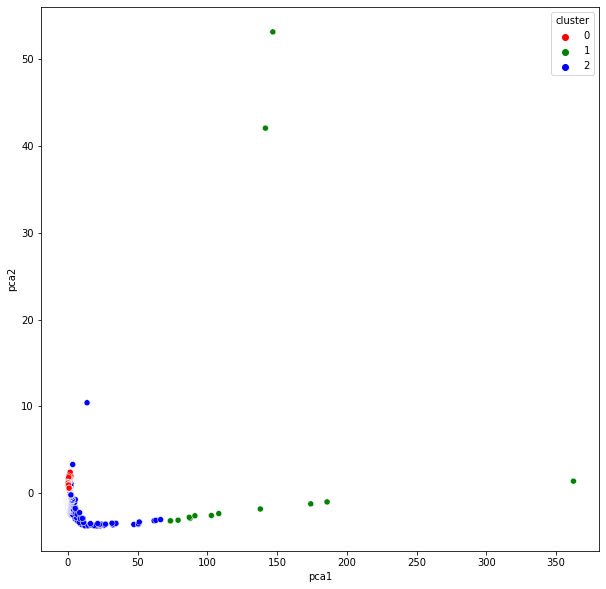

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y = "pca2", hue="cluster", data = pca_df, palette=["red", "green", "blue"])
plt.show()